# Imports and function definitions

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_case_storage="C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//parkmeter_coords.h5"

In [63]:
def list_HDF_file(file_name):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        result = store.keys()   
    return result

def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        return store[table]

# Data reading and information extraction

In [14]:
# Extracting the parkmeter coordinates and deleting the duplicates
parkmeter_data = read_HDF_file(data_case_storage,"/parkmeter_coordinates")

In [15]:
# Printing stuff
# print(type(parkmeter_coordinates))
# print(parkmeter_coordinates.shape)
# print(parkmeter_coordinates.head(10))

# Transforms them into a proper array
parkmeter_number = len(parkmeter_data['parkmeter_coordinates'])
parkmeter_coords_list = [np.fromstring(parkmeter_data['parkmeter_coordinates'][idx], dtype=np.float64, sep=", ") 
                         for idx in range(parkmeter_number)]
parkmeter_amount_list = [(parkmeter_data['amount'][idx])
                         for idx in range(parkmeter_number)]
swapped_coords = np.column_stack((np.array(parkmeter_coords_list), np.array(parkmeter_amount_list)))

new_coords = pd.DataFrame()

coords = np.zeros(swapped_coords.shape)
coords[:, 0], coords[:, 1] = swapped_coords[:, 1], swapped_coords[:, 0]
coords[:, 2] = swapped_coords[:, 2]

# Some printings

In [66]:
print("Total number of parkmeters : " + str(len(parkmeter_data['parkmeter_coordinates'])))

Total number of parkmeters : 7805


In [65]:
x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
y_min, y_max = coords[:, 1].min(), coords[:, 1].max()

# Plot of the parkmeters repartition

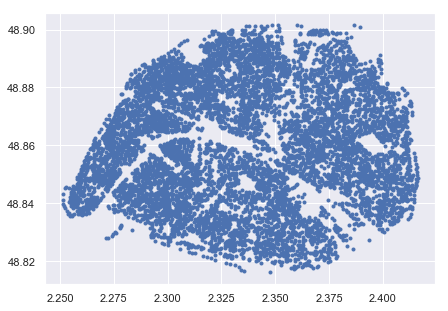

In [57]:
plt.subplots(figsize=(7, 5))
sns.set(style="darkgrid")
plt.plot(coords[:, 0], coords[:, 1], 'b.')
plt.show()

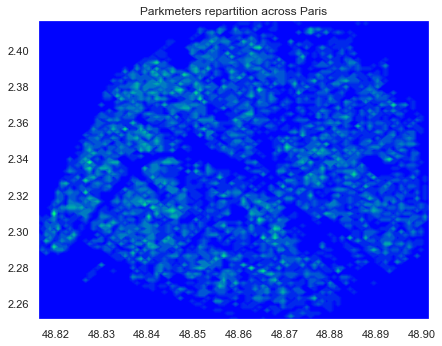

In [58]:
# Representing the repartition of the parkmeters across the map
grid_param = 100
x_step = (x_max - x_min)/(grid_param-1)
y_step = (y_max - y_min)/(grid_param-1)

x_mesh = np.linspace(x_min, x_max, num=grid_param);
y_mesh = np.linspace(y_min, y_max, num=grid_param);
parkmeter_repartition = np.zeros((grid_param, grid_param))
for i in range(coords.shape[0]):
    x_idx = int((coords[i, 0] - x_min)/x_step)
    y_idx = int((coords[i, 1] - y_min)/y_step)
    parkmeter_repartition[x_idx, y_idx] += 1


X, Y = np.meshgrid(x_mesh, y_mesh)
Z = parkmeter_repartition

# Don't ask me why Y comes before X, cause I'll answer you "yes"
plt.subplots(figsize=(7, 5.5))
plt.contourf(Y, X, Z, 50, cmap='winter')
#plt.colorbar()
plt.title("Parkmeters repartition across Paris")
plt.show()

# Plot of the parkmeter earnings

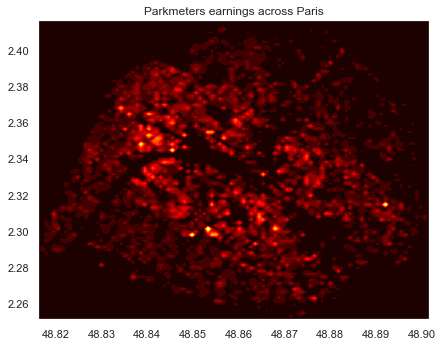

In [62]:
# Representing the repartition of the parkmeters across the map
grid_param = 100
x_step = (x_max - x_min)/(grid_param-1)
y_step = (y_max - y_min)/(grid_param-1)

x_mesh = np.linspace(x_min, x_max, num=grid_param);
y_mesh = np.linspace(y_min, y_max, num=grid_param);
parkmeter_repartition = np.zeros((grid_param, grid_param))
for i in range(coords.shape[0]):
    x_idx = int((coords[i, 0] - x_min)/x_step)
    y_idx = int((coords[i, 1] - y_min)/y_step)
    parkmeter_repartition[x_idx, y_idx] += coords[i, 2]


X, Y = np.meshgrid(x_mesh, y_mesh)
Z = parkmeter_repartition

# Don't ask me why Y comes before X, cause I'll answer you "yes"
plt.subplots(figsize=(7, 5.5))
plt.contourf(Y, X, Z, 20, cmap='hot')
#plt.colorbar()
plt.title("Parkmeters earnings across Paris")
plt.show()